# Relationship Between Diabetes and Obesity


## Introduction

Diabetes is a prevalent disease which has dramatically increased in recent years. With advances in healthcare, it would be assumed that the general population is healthy. However, obesity is on the rise and the relationship between the two increasing trends will be investigated. 

Obesity is quantified through body mass index (BMI), which takes into account a person's height and weight to measure if an individual is healthy. Ideally, an individual will be in the range of 18.5 to 24.9 (NHS, 2012). Although significant research has been done that BMI *may be an underlying risk factor* for being diabetic (Feldman et al., 2017), this study aims to obtain a quantifiable number in the difference in BMI between a diabetic and nondiabetic which will benefit future research. Thus, the research question is: **Is the average (mean) BMI value of people with diabetes higher than those who do not have diabetes?**
 
The dataset was obtained from the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) consisting of participants that were females at least 21 years old and their health statistics. The BMI variable (kg/m^2) will be split into two groups based on the outcome (TRUE indicating diabetic, and FALSE indicating non-diabetic) in order to conduct analysis of mean and confidence interval.


## Preliminary Results

In [50]:
library(cowplot)
library(digest)
library(gridExtra)
library(infer)
library(repr)
library(tidyverse)
library(datateachr)

# color blind friendly color 
lightblue <- "#56B4E9"
lightorange <- "#E69F00"
lightgreen <- "#009E73"

In [13]:
set.seed(999)
options(repr.plot.width = 15, repr.plot.height = 10) 

In [14]:
# dataset read from the web ------------------------------------------------------------
diabetes <- read_csv('https://raw.githubusercontent.com/Kayleeli/STAT201-Group-23/main/data/diabetes.csv') 
head(diabetes, n = 3)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (8): pregnancies, glucose, bloodpressure, skinthickness, insulin, bmi, d...
lgl (1): outcome

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
6,148,72,35,0,33.6,0.627,50,TRUE
1,85,66,29,0,26.6,0.351,31,FALSE
8,183,64,0,0,23.3,0.672,32,TRUE


In [15]:
# Check the sample size of our sample is large enough (to ensure it's could pass the central limit theorem (CLT) assumptions)
    sample_size <- matrix(nrow(diabetes), ncol = 1, byrow = TRUE) 
    colnames(sample_size) <- c("Sample Size (Total Observation in Dataset)")
    rownames(sample_size) <- c('Count')
    sample_size <- as.data.frame(sample_size)

# Our sample contain 768 observations (n = 768). This should be sufficiently large but less than 10% of the population. This pass the CLT assumption.
sample_size

,Sample Size (Total Observation in Dataset)
,<int>
Count,768


In [16]:
# clean + wrangled the data into tidy format ------------------------------------------

    # because we only want to focus on the relationship between bmi + outcome, selecting only:
        # 1) bmi column : body mass index in kg/m^2
        # 2) outcome column : TRUE = diabetic , FALSE = Non-diabetic

diabetes <- diabetes %>%
    select(bmi, outcome)

    # splitting people into 2 groups based on "outcome" (TRUE (diabetic) vs FALSE (non-diabetic))

diabetic_group <- diabetes %>%
    filter(outcome=="TRUE") %>%
    select(bmi)

nondiabetic_group <- diabetes %>%
    filter(outcome=="FALSE") %>%
    select(bmi)

head(diabetic_group, n = 2)
head(nondiabetic_group, n = 2)

bmi
<dbl>
33.6
23.3


bmi
<dbl>
26.6
28.1


In [17]:
# Compute estimates of the parameter identified + plot relevant data -------------------

In [60]:
# SAMPLE PARAMETER

    # mean bmi values for people who are diabetic in this dataset
    diabetic_group_mean <- diabetic_group %>%
        summarize(mean = mean(bmi)) %>%
        pull()

    # mean bmi values for people who are non-diabetic in this dataset
    nondiabetic_group_mean <- nondiabetic_group %>%
        summarize(mean = mean(bmi)) %>%
        pull()

    # difference in mean bmi value for people with and without diabetes in this dataset
    difference_in_mean_pop <- diabetic_group_mean - nondiabetic_group_mean

    # summary of the population parameter calcuated above into a dataframe
    pop_parameter_summary <- matrix(c(diabetic_group_mean, nondiabetic_group_mean, difference_in_mean_pop), ncol = 3, byrow = TRUE) 
    colnames(pop_parameter_summary) <- c("Sample BMI Mean Value (Diabetic)", "Sample BMI Mean Value (Non-Diabetic)", "Difference in BMI Mean Value in Sample ((Diabetic)-(Non-Diabetic))")
    rownames(pop_parameter_summary) <- c('Values (in kg/m^2)')
    table_pop_parameter_summary <- as.data.frame(pop_parameter_summary)


# SAMPLE PARAMETER VALUES (SUMMARY)
table_pop_parameter_summary

,Sample BMI Mean Value (Diabetic),Sample BMI Mean Value (Non-Diabetic),Difference in BMI Mean Value in Sample ((Diabetic)-(Non-Diabetic))
,<dbl>,<dbl>,<dbl>
Values (in kg/m^2),35.14254,30.3042,4.838337


Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


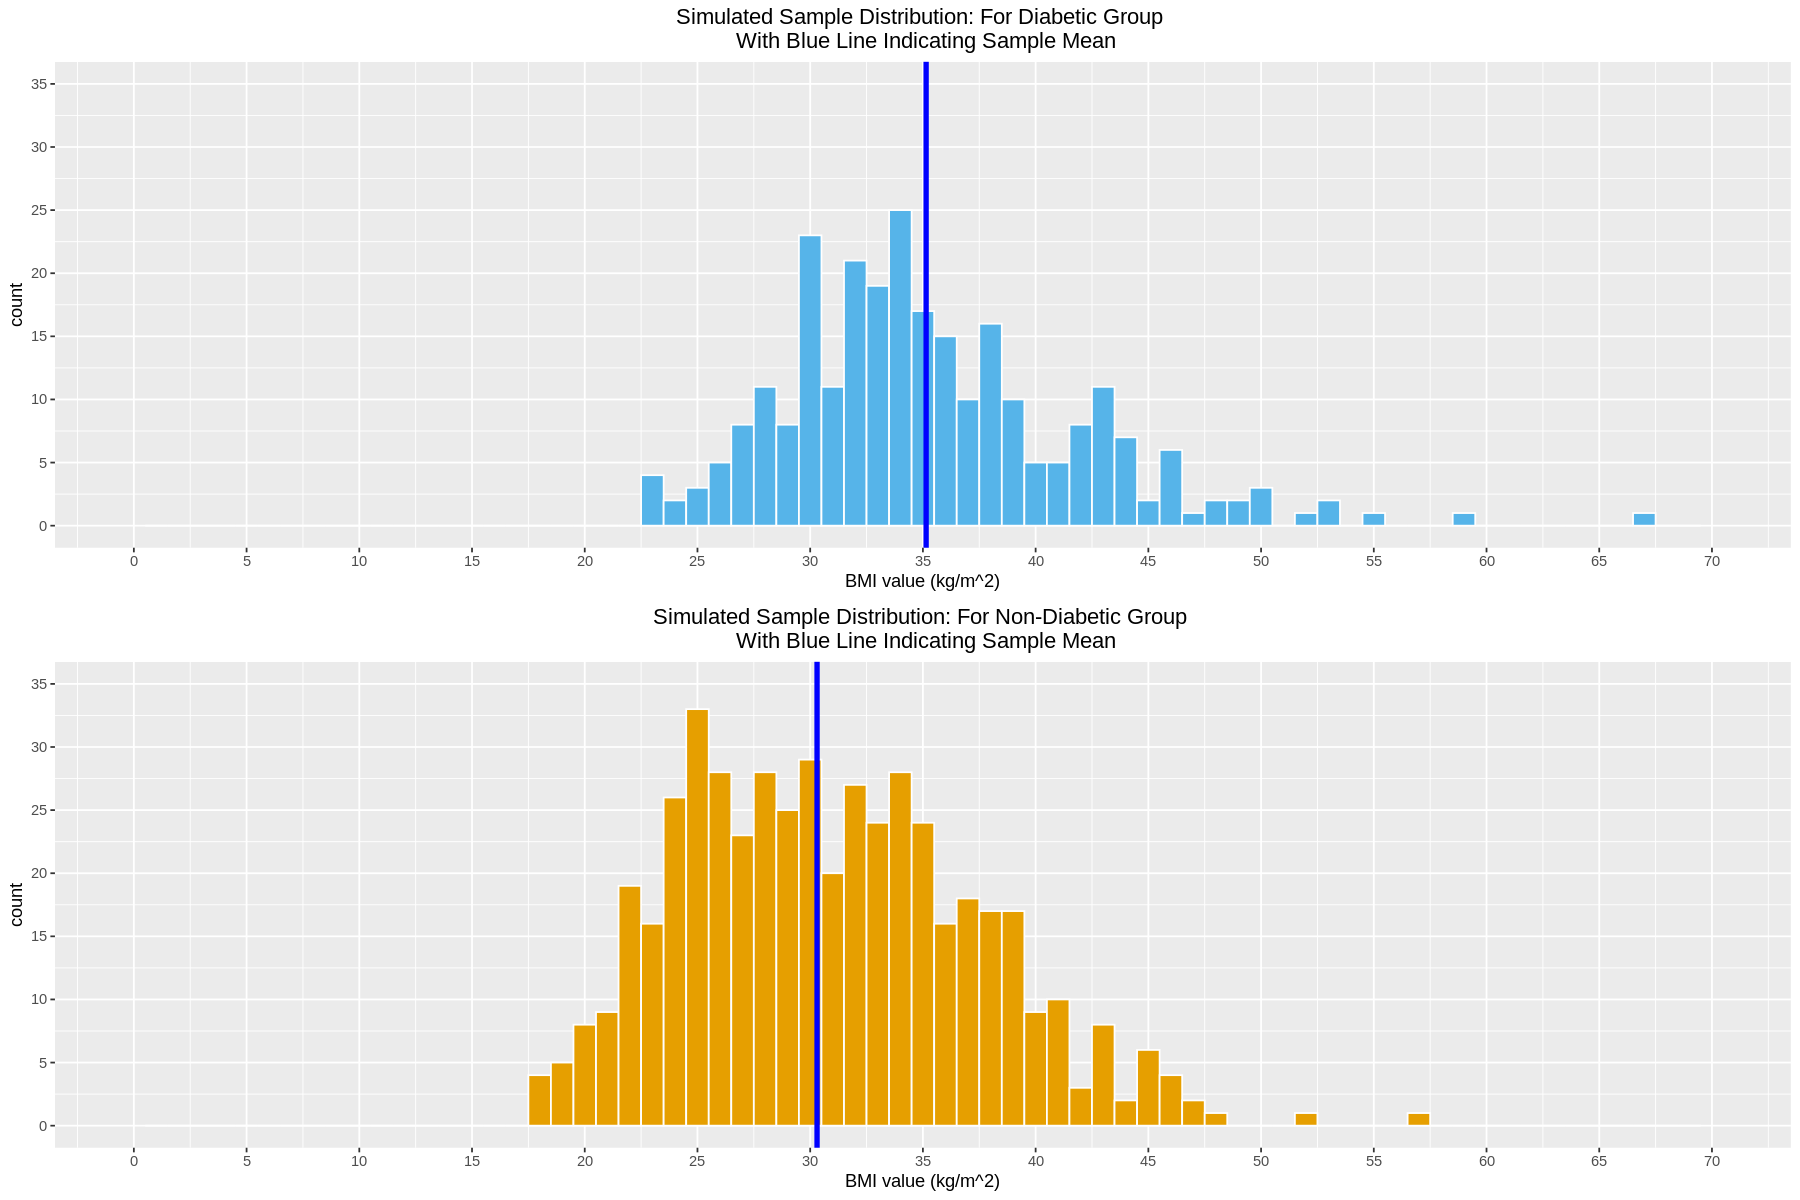

In [68]:
# HISTOGRAM : SAMPLE DISTRIBUTION

    ## FOR DIABETIC GROUP:
    diabetics_sample_hist <- diabetic_group %>%
            ggplot(aes(x=bmi))+
            geom_histogram(binwidth=1, color="white", fill = lightblue)+
            labs(x="BMI value (kg/m^2)")+
            ggtitle("Simulated Sample Distribution: For Diabetic Group \n With Blue Line Indicating Sample Mean") +
            theme(plot.title = element_text(hjust = 0.5)) +
            scale_x_continuous(limits = c(0, 70), breaks=seq(0,70, 5)) +
            scale_y_continuous(limits = c(0, 35), breaks=seq(0,35, 5)) +
            geom_vline(xintercept = diabetic_group_mean, color = 'blue', size = 1.5) 

    ## FOR NON-DIABETIC GROUP:
    nondiabetics_sample_hist <- nondiabetic_group %>%
            ggplot(aes(x=bmi))+
            geom_histogram(binwidth=1, color="white", fill = lightorange)+
            labs(x="BMI value (kg/m^2)")+
            ggtitle("Simulated Sample Distribution: For Non-Diabetic Group \n With Blue Line Indicating Sample Mean") +
            theme(plot.title = element_text(hjust = 0.5)) +
            scale_x_continuous(limits = c(0, 70), breaks=seq(0,70, 5)) +
            scale_y_continuous(limits = c(0, 35), breaks=seq(0,35, 5)) +
            geom_vline(xintercept = nondiabetic_group_mean, color = 'blue', size = 1.5) 

# Histogram of SAMPLE distribution
plot_grid(diabetics_sample_hist, nondiabetics_sample_hist, nrow = 2)

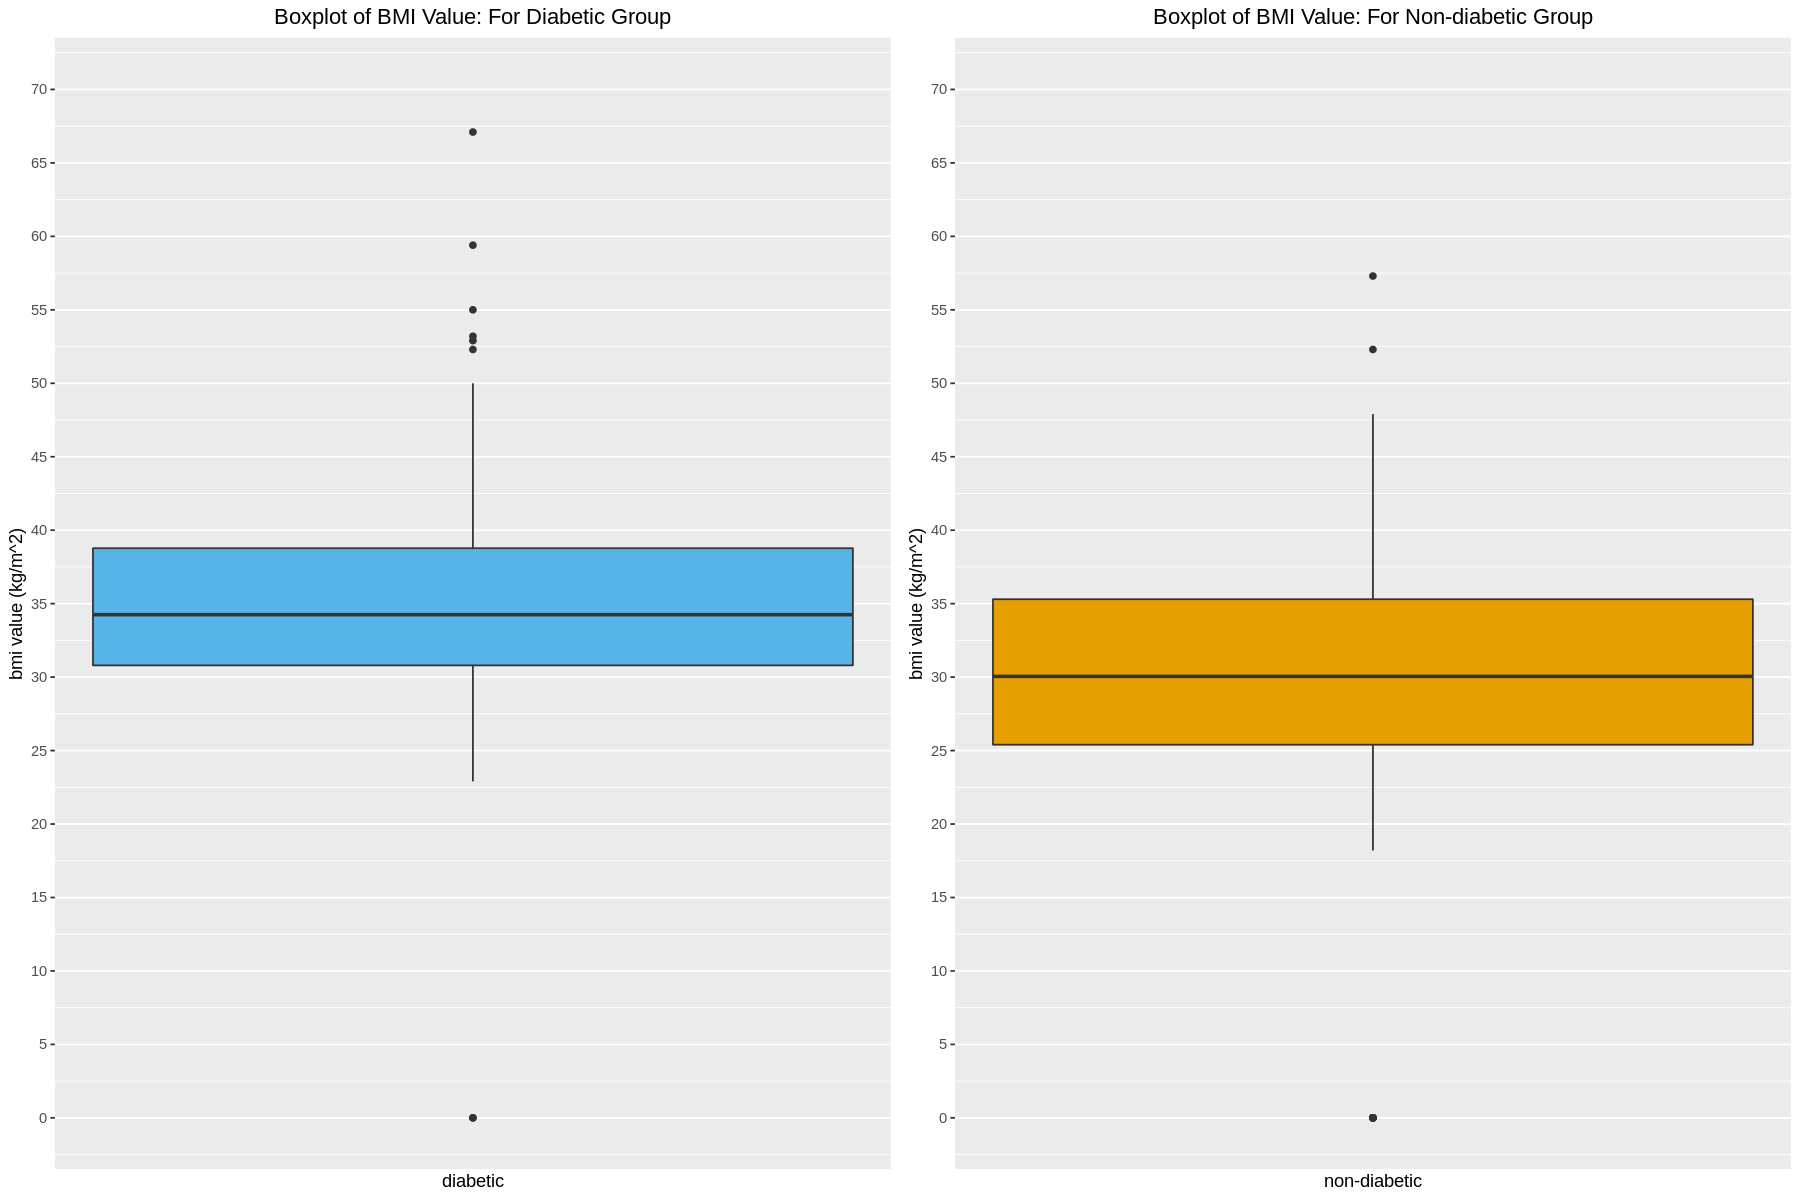

In [69]:
# BOXPLOT

    ## FOR DIABETIC GROUP:
    boxplot_diabetic <- diabetic_group %>%
            ggplot(aes(y = bmi)) +
            geom_boxplot(fill = lightblue) +
            labs( y = "bmi value (kg/m^2)", x = 'diabetic', title = "Boxplot of BMI Value: For Diabetic Group") +
            scale_y_continuous(limits = c(0,70), breaks=seq(0,100, 5)) +
            scale_x_continuous(breaks=seq(-100,100, 200)) +
            theme(plot.title = element_text(hjust = .5))

    ## FOR NON-DIABETIC GROUP:
    boxplot_nondiabetic <- nondiabetic_group %>%
            ggplot(aes(y = bmi)) +
            geom_boxplot(fill = lightorange) +
            labs(y = "bmi value (kg/m^2)", x = 'non-diabetic', title = "Boxplot of BMI Value: For Non-diabetic Group") + 
            scale_y_continuous(limits = c(0,70), breaks=seq(0,100, 5)) +
            scale_x_continuous(breaks=seq(-100,100, 200)) +
            theme(plot.title = element_text(hjust = .5))


# BOXPLOT of BMI values 
plot_grid(boxplot_diabetic, boxplot_nondiabetic)

In [114]:
# The mean BMI value in non-diabetic group is lower than that of diabetic group based on the sample distributions and the boxplot above.
# The difference in mean (by how much, and regarding how much confidence and significant our result is) will be study further in our analysis. 

## Method/Plan

Bootstrapping and hypothesis testing via randomization will be used to conduct this inferential study. Let m1 be the mean BMI value for females with diabetes, and m2 be the mean BMI value for females without diabetes with the following hypothesis:

<center>
$$ \text{Null Hypothesis} : m_1 - m_2 = 0 $$

    
$$ \text{Alternative hypothesis}: m_1-m_2 > 0 $$ 

</center>

Some “good things'' about this analysis is that the data is taken from NIDDK, ensuring its authenticity and validity. Furthermore, it passes the central limit theorem (CLT) assumptions: such that the dataset is drawn independently, the sample size is less than 10% of the population, and the sample size is sufficiently large for this analysis to make assumptions about the population parameter.  

However, since this study infers the population based on sample data, the plots and estimates produced aren't sufficient to provide to a stakeholder. To address this gap, a broader confidence interval (with a 95% confidence level) will be constructed along with the correlated margin of error in order to ensure the true difference in means is included. Furthermore, a hypothesis test with a p-value of 5% significance level will be conducted.

Through this study, it is predicted that people with diabetes have much higher BMI mean value than those who do not have diabetes. In other words, any increase in BMI above normal weight levels is associated with an increased risk of being diagnosed as having complications of diabetes.

Given the considerable health and financial costs associated with diabetes  (Huang, 2015), these findings have important policy-forming formulations, which help improve early evaluation and management of risk factors leading to diabetes. Future studies may investigate the effect of abdominal obesity on diabetes, as well as the relationship between food environment and diabetes. 

## References

Feldman, A. L., Griffin, S. J., Ahern, A. L., Long, G. H., Weinehall, L., Fhärm, E., ... & Wennberg, P. (2017). Impact of weight maintenance and loss on diabetes risk and burden: a population-based study in 33,184 participants. BMC Public Health, 17(1), 1-10. doi:  10.1186/s12889-017-4081-6.

Huang, J. (2015). Commentary on “Relation between BMI and Diabetes Mellitus and Its
Complications among US Older Adults”. Southern Medical Journal, 108 (1), 37-38. doi: 10.14423/SMJ.0000000000000215.

Namdev, P. (2018, March 25). Diabetes_dataset. Kaggle. Retrieved July 21, 2022, from https://www.kaggle.com/datasets/pushprajnamdev/diabetes-dataset?resource=download&select=diabetes.csv

NHS. (n.d.). NHS choices. Retrieved July 25, 2022, from https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/ 
